1. Import the necessary files.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

2. Import the given dataset from a public data source.


In [ ]:
df = pd.read_csv("diabetes.csv")

3. Identify dependent and independent features.


In [ ]:
dependent = 'Outcome'
independent = df.columns.drop('Outcome')
print("Dependent Feature:", dependent)
print("Independent Features:", list(independent))

Dependent Feature: Outcome
Independent Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


4. Display the dataset.
    1.Head
    2.Tail
    3.Display the rows in the given dataset from row 5 to row 17 .


In [ ]:
print("Head:\n", df.head())

Head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print("Tail:\n", df.tail())

Tail:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [ ]:
print("Rows 5 to 17:\n", df.iloc[5:18])

Rows 5 to 17:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107            

5. DATA CLEANING

1.Identify the missing values.   

In [ ]:
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)


  2.Identify the total number of null values for feature       


In [ ]:
print("Nulls per column:\n", df.isnull().sum())

Nulls per column:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



 3.Handle the duplicates  


In [ ]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


 4.Find out the total no. of null values for the given dataset   

In [ ]:
print("Total null values in dataset:", df.isnull().sum().sum())

Total null values in dataset: 652



 5.Identify the mean of the feature and replace it with the null values.   


In [ ]:
imputer = SimpleImputer(strategy='mean')
df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

In [ ]:
print("Total null values in dataset:", df.isnull().sum().sum())

Total null values in dataset: 0


6.try to identify your feature with missing value and replace with constant or suitable value consider the remaining data values.

In [ ]:
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())

7.Describe

In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

8.Display the information of the dataset.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


9.Find the mean for a particular observation.

In [ ]:
print("Mean of row 10 (excluding outcome):", df.iloc[10][:-1].mean())

Mean of row 10 (excluding outcome): 57.31158036794993


10.Summary     


In [ ]:
print("Summary:\n", df.describe(include='all'))

Summary:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000        

6. Display at least 4 visual graphs/plots for the given dataset.

1.Box plot

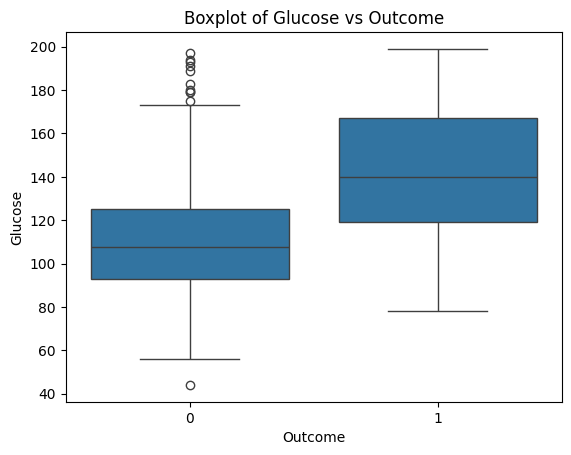

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Boxplot of Glucose vs Outcome")
plt.show()

2.Scatter plot

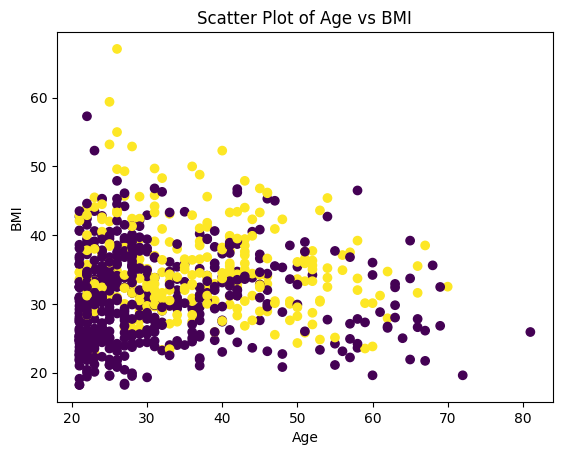

In [ ]:
plt.scatter(df['Age'], df['BMI'], c=df['Outcome'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs BMI')
plt.show()

3.Histogram

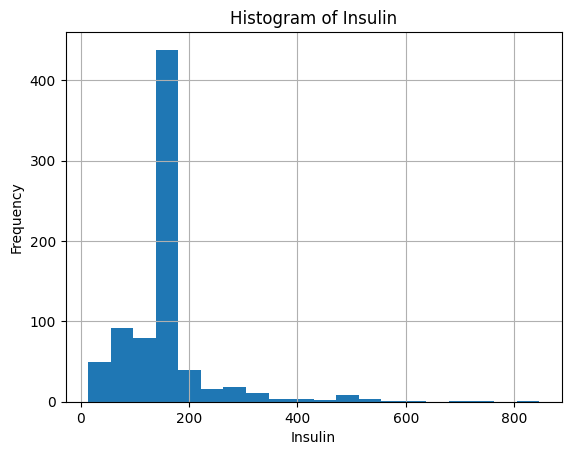

In [ ]:
df['Insulin'].hist(bins=20)
plt.title("Histogram of Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()

4.Pie chart (Description , syntax)  

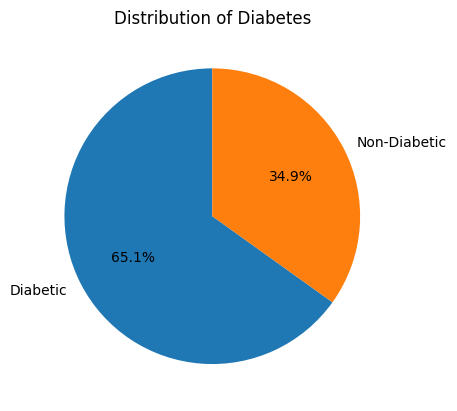

In [ ]:
labels = ['Diabetic', 'Non-Diabetic']
sizes = df['Outcome'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Diabetes")
plt.show()

5.KDE plot

/tmp/ipython-input-899849349.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


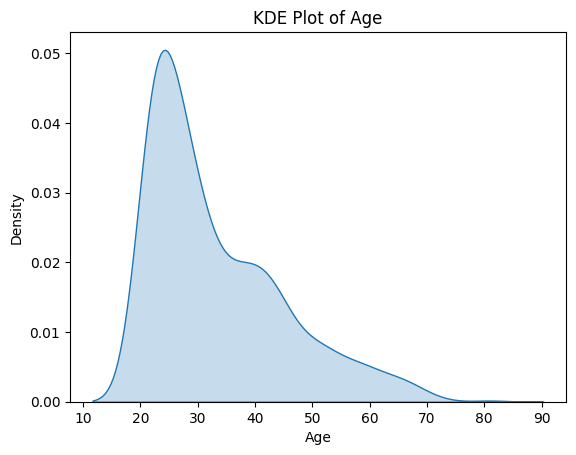

In [ ]:
sns.kdeplot(df['Age'], shade=True)
plt.title("KDE Plot of Age")
plt.show()

For Applying  encoding i add bmi categorical column in that so i can apply

In [ ]:
df['BMI_Category'] = pd.cut(df['BMI'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [ ]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Obese
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Obese


 Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['BMI_LabelEncoded'] = le.fit_transform(df['BMI_Category'].astype(str))  # Convert to string to avoid NaN issues

In [ ]:
print("\n Label Encoded BMI:\n", df[['BMI_Category', 'BMI_LabelEncoded']].head(10))


 Label Encoded BMI:
   BMI_Category  BMI_LabelEncoded
0        Obese                 1
1   Overweight                 2
2       Normal                 0
3   Overweight                 2
4        Obese                 1
5   Overweight                 2
6        Obese                 1
7        Obese                 1
8        Obese                 1
9        Obese                 1


One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)

In [ ]:
print("\n One-Hot Encoded BMI Categories (first few rows):\n", df.filter(like='BMI_Category').head(10))


 One-Hot Encoded BMI Categories (first few rows):
    BMI_Category_Normal  BMI_Category_Overweight  BMI_Category_Obese
0                False                    False                True
1                False                     True               False
2                 True                    False               False
3                False                     True               False
4                False                    False                True
5                False                     True               False
6                False                    False                True
7                False                    False                True
8                False                    False                True
9                False                    False                True


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_LabelEncoded,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,1,False,False,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,2,False,True,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0,True,False,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,2,False,True,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,1,False,False,True
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,1,False,False,True
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,2,False,True,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,1,False,False,True


drop encoded columns for go that to main dataset which i already have

In [ ]:
# Safely drop label encoded column
if 'BMI_LabelEncoded' in df.columns:
    df.drop('BMI_LabelEncoded', axis=1, inplace=True)

# Safely drop one-hot encoded columns
one_hot_cols = [col for col in df.columns if col.startswith('BMI_Category_')]
if one_hot_cols:
    df.drop(columns=one_hot_cols, inplace=True)

# Safely drop original BMI_Category (if still exists)
if 'BMI_Category' in df.columns:
    df.drop('BMI_Category', axis=1, inplace=True)

# Check remaining columns
print("\n✅ Columns after safe drop:\n", df.columns)



✅ Columns after safe drop:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


Correlation Matrix

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


HeatMap

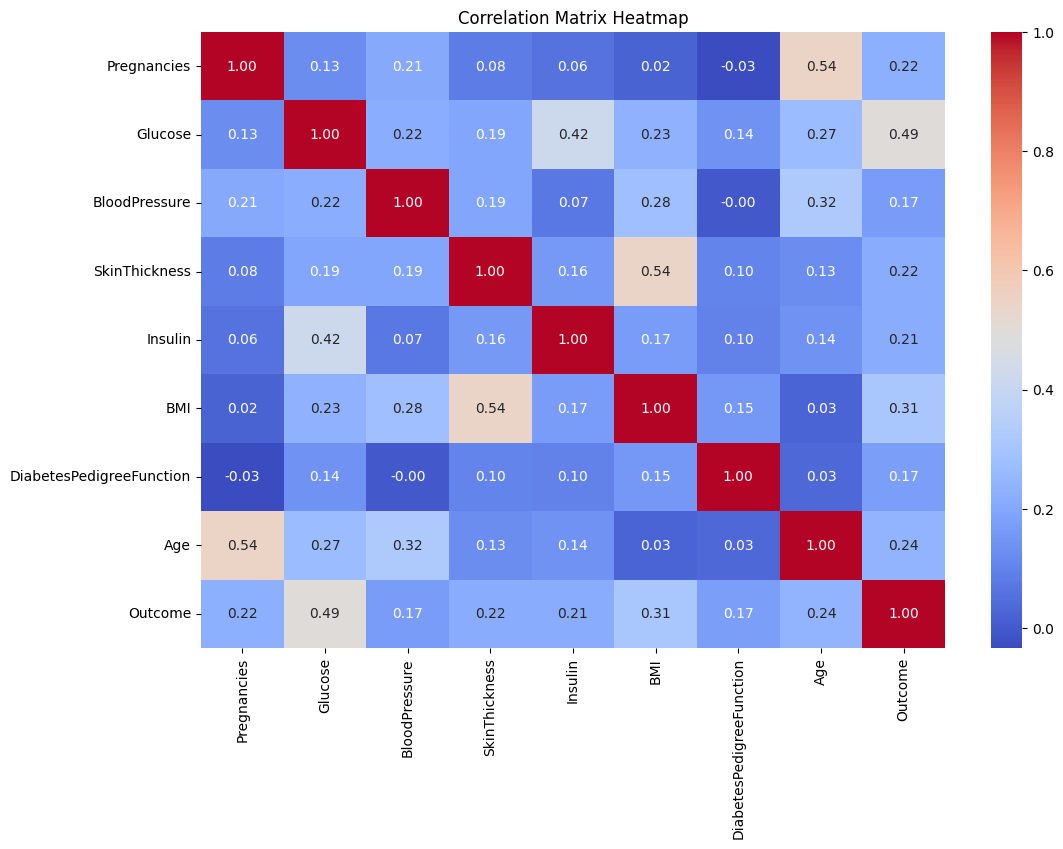

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

Violin Plot

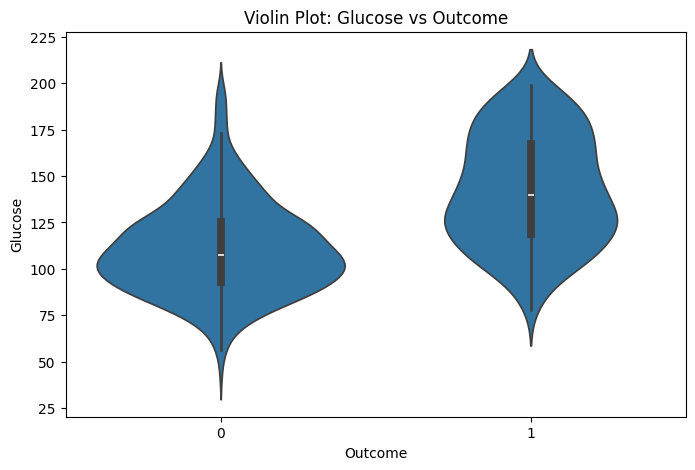

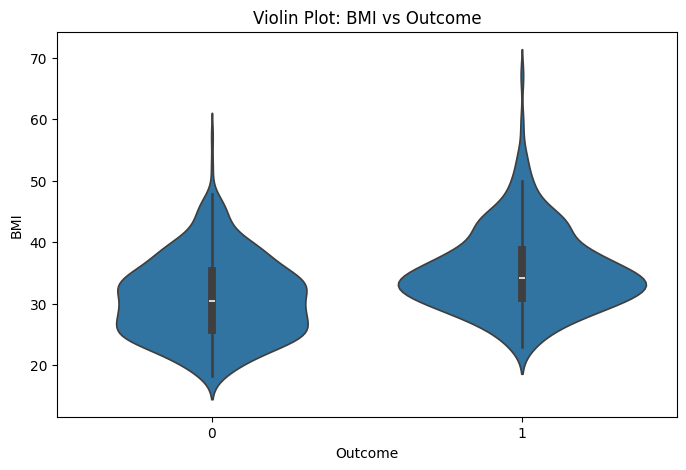

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title('Violin Plot: Glucose vs Outcome')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.title('Violin Plot: BMI vs Outcome')
plt.show()

MinMax Scaler

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Train / Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [ ]:
knn_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

In [ ]:
nb_preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

Evaluation Function

In [ ]:
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model("KNN", y_test, knn_preds))
results.append(evaluate_model("Naive Bayes", y_test, nb_preds))

# Create comparison table
results_df = pd.DataFrame(results)
print("\n🔍 Model Comparison Table:")
print(results_df)


🔍 Model Comparison Table:
         Model  Accuracy  Precision    Recall  F1 Score
0          KNN  0.753247   0.654545  0.654545  0.654545
1  Naive Bayes  0.746753   0.637931  0.672727  0.654867


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Model Training

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predictions and Classification Report

In [ ]:
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Train Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154

Confusion Matrix:
 [[70 29]
 [13 42]]
Accuracy Score: 0.7272727272727273


K-Fold Cross Validation

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)
print("K-Fold CV Accuracy Scores:", scores)
print("Average CV Accuracy:", scores.mean())


K-Fold CV Accuracy Scores: [0.72727273 0.75974026 0.74025974 0.80392157 0.73856209]
Average CV Accuracy: 0.7539512774806892


Visualize the Decision Tree

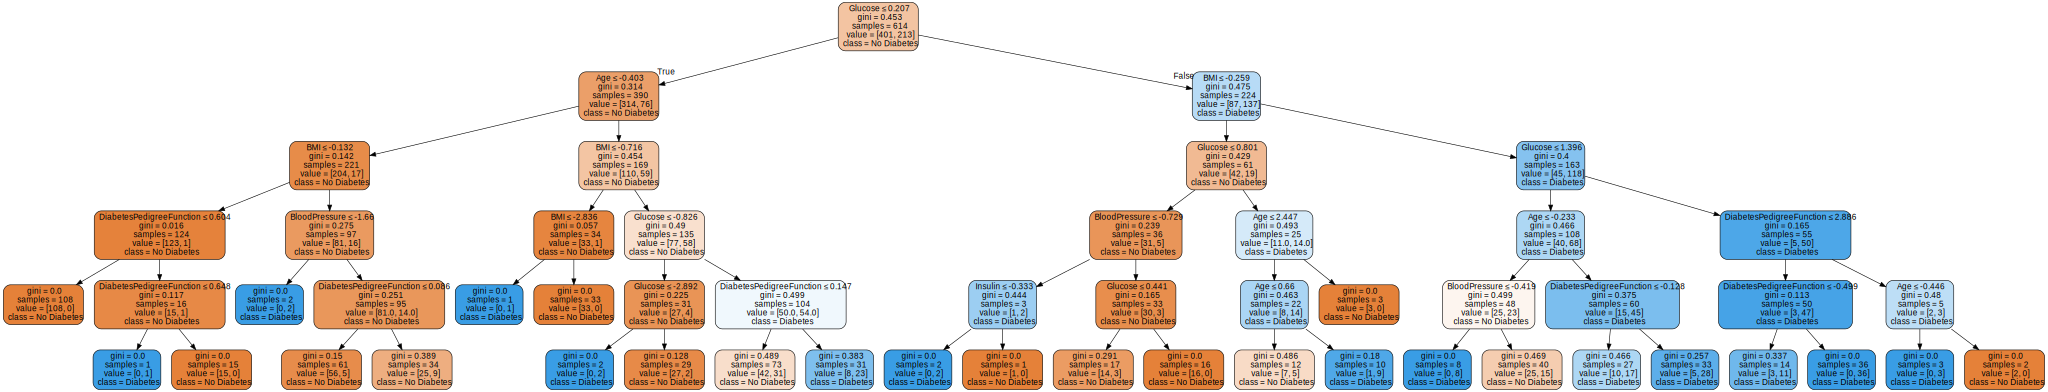

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the tree in DOT format
dot_data = export_graphviz(dt,
                           out_file=None,
                           feature_names=df.columns[:-1],
                           class_names=["No Diabetes", "Diabetes"],
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create and render the graph
graph = graphviz.Source(dot_data)
graph.render("decision_tree_diabetes", format="png", cleanup=True)  # saves PNG
graph


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset from local CSV file
df = pd.read_csv('diabetes.csv')  # Make sure your file is named 'diabetes.csv' and is in the same folder

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()

# Train models
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Evaluate both models
dt_metrics = evaluate_model(y_test, y_pred_dt)
nb_metrics = evaluate_model(y_test, y_pred_nb)

# Display results in a table
comparison_df = pd.DataFrame([dt_metrics, nb_metrics], index=['Decision Tree', 'Naive Bayes'])
print(comparison_df)


               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.746753   0.625000  0.727273  0.672269
Naive Bayes    0.766234   0.661017  0.709091  0.684211


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load dataset (replace with your local CSV)
df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,              # 5-fold cross-validation
                           n_jobs=-1,         # Use all CPU cores
                           verbose=1,
                           scoring='accuracy')

# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_

# Predict on test set using best model
y_pred = best_dt.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

